In [1]:
import pandas as pd
import warnings
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import fcluster
sns.set_theme(style="darkgrid")
df = pd.read_excel("/content/drive/MyDrive/dath/File For Challenge Open Data.xlsx")
df1= df 

# Exploratory data 

In [ ]:
df1.iloc[:,-2:]
freq_df = df1.groupby('Q7_A6')['Q7_A5'].value_counts()
freq_df

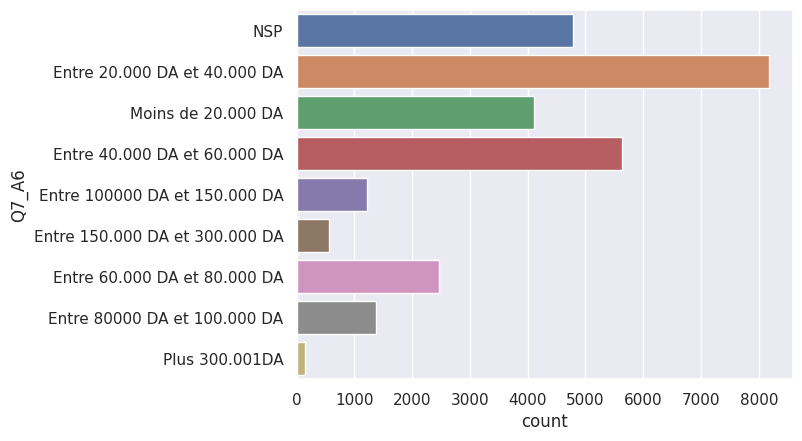

In [3]:
sns.countplot(y="Q7_A6",data = df1);

furthermore , the "NSP" value that was appearent in the salary variable standed for an NA value so it had to be filled instead of being dropped due to it's high frequency , to do so , a random forest  was preferred over the mode to predict the NAs.(avoid biasing the distribution)


# **Importing,cleaning and preprocessing.**
we noticed after havy data exploration there was a lot of preprocessing that should be done before the data is ready to be modeled , we started by removing the ID column : that can't be used , we also dropped 3 columns (at least one tv , at least reciever , internet) which carried redundent information.

also some variables needed to be numerically incoded , salary was ordinally incoded in order to catch it's full effect (weights) , the vehicul variable was also treated in the same way , as for the rest we used dummy variables 

we also have the priop knowledge of the geoeffect on the quality of life in Algeria , disparity between north and south and we wanted to capture the effect so we stringprocessed the salary variable again and made it take means instead and we grouped (wilayas) based on those mean and extracted 4 classes that were havily influenced by the geografical position.



In [4]:
df=df.drop(["Id","WILAYA","Q7TV","Q7CONX","Q7DEMO"],axis=1)

for i in df.columns :
  df[i] = df[i].replace({'N':0, 'O':1})
#
df['Q7_A6'] = df['Q7_A6'].replace({'Moins de 20.000 DA':0, 'Entre 20.000 DA et 40.000 DA':1,'Entre 40.000 DA et 60.000 DA':2,
                                   'Entre 60.000 DA et 80.000 DA':3,'Entre 80000 DA et 100.000 DA':4,'Entre 100000 DA et 150.000 DA':5,'Entre 150.000 DA et 300.000 DA':6,
                                   'Plus 300.001DA':7})
df['Q7_A5'] = df['Q7_A5'].replace({'Aucune':0, 'Une voiture':1,'Deux voitures':2,
                                   'Trois voitures ou plus':3})
#
test = df[df["Q7_A6"]=="NSP"]
train = df[df["Q7_A6"]!="NSP"]
train['Q7_A6'] = train['Q7_A6'].astype(int)
str_cols = train.select_dtypes(include=['object']).columns
train[str_cols]
dummy_dfhhh = pd.get_dummies(train[str_cols])
train.iloc[:,2:-2]
trainn = pd.concat([dummy_dfhhh,train.iloc[:,2:-1]],axis = 1)
train_X ,train_Y = trainn , train['Q7_A6']
test=test.drop("Q7_A6",axis=1)
str_cols1 = test.select_dtypes(include=['object']).columns
dummy_df_test = pd.get_dummies(test[str_cols1])
testt = pd.concat([dummy_df_test,test.iloc[:,2:]],axis = 1)


<ipython-input-4-3b0150f411d4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Q7_A6'] = train['Q7_A6'].astype(int)


# **Filling up the NSP value by fitting a random forest and tuning it "takes 2 minutes"**

In [5]:
features = train_X.columns
target = 'Q7_A6'
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [10, 20, 30],
              'random_state': [42]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search.fit(train_X, train_Y)
print("Best hyperparameters:", grid_search.best_params_)
print("Best mean cross-validation score:", grid_search.best_score_)
best_rf = grid_search.best_estimator_
best_rf.fit(train_X, train_Y)
y_pred = best_rf.predict(testt)




Best hyperparameters: {'max_depth': 10, 'n_estimators': 150, 'random_state': 42}
Best mean cross-validation score: 0.3934329803857611


# **More cleaning**

In [6]:
finalx = pd.concat([trainn,testt],axis = 0)
finaly = np.concatenate((train_Y, y_pred), axis=0)
finalx['Q7_A6'] = finaly
finalx['Q7_A6_2'] = finalx['Q7_A6'].replace({0:10000, 1:30000,2:50000,3:70000,4:90000,5:125000,6:225000,7:400000})
finalx["Wilaya"] = df1["WILAYA"]
finalx["Wilaya"] = finalx["Wilaya"].replace({'Adrar':2, 'Ain Defla':3, 'AinTemouchent':3, 'Alger':3, 'Annaba':3,
       'B.B.Arreridj':3, 'Batna':2, 'Bechar':2, 'Bejaia':3, 'Biskra':1, 'Blida':3,
       'Bouira':3, 'Boumerdes':3, 'Chlef':1, 'Constantine':3, 'Djelfa':0,
       'El Bayadh':3, 'El Oued':3, 'El Taref':0, 'Ghardaia':1, 'Guelma':3, 'Illizi':0,
       'Jijel':3, 'Khenchela':3, 'Laghouat':2, "M'sila":1, 'Mascara':1, 'Medea':0,
       'Mila':3, 'Mostaganem':3, 'Naama':3, 'O. E. Bouaghi':3, 'Oran':3, 'Ouargla':2,
       'Relizane':3, 'Saida':0, 'Setif':3, 'Sidi Bel Abbes':1, 'Skikda':3,
       'Souk Ahras':0, 'Tamenrasset':2, 'Tebassa':1, 'Tiaret':3, 'Tindouf':0,
       'Tipaza':3, 'Tissemsilt':0, 'Tizi Ouzou':3, 'Tlemcen':1})
finalx=finalx.drop("Q7_A6_2",axis=1)

# **UNSUPERVISED CLUSTRING**
## **K-Means tuning using elbow method**

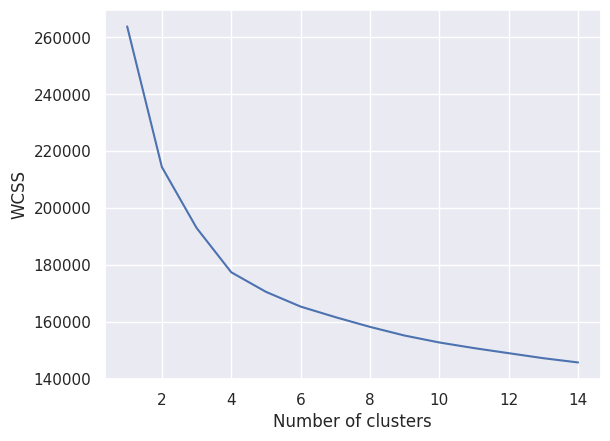

In [9]:
warnings.filterwarnings("ignore")
data = finalx.values
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## **K-means 4 is the optimal number of clusters**

In [10]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data)

KMeans(n_clusters=4)

# **Hierarchical clustring "takes 10 minutes to fit"**

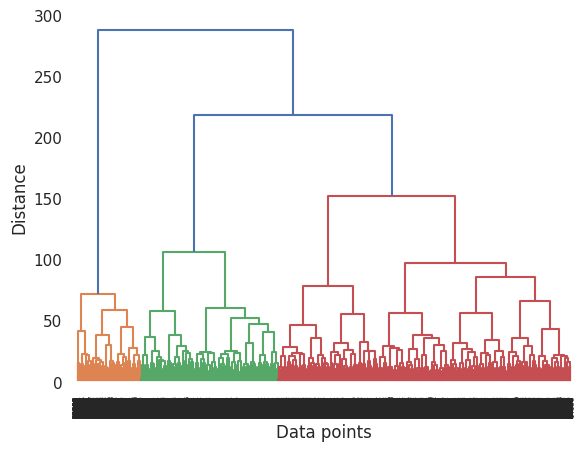

In [11]:
data = finalx
linkage_matrix = linkage(data, method='ward')
dendrogram(linkage_matrix)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()
labels = fcluster(linkage_matrix, t=4, criterion='maxclust')
new_labels = np.zeros_like(labels)
new_labels[labels == 4] = 0
new_labels[labels == 3] = 1
new_labels[labels == 2] = 2
new_labels[labels == 1] = 3
labels = new_labels

# **Using the lables from k means as the target variable for a random forest model**

In [12]:
data_rf_km_train_X ,data_rf_km_train_Y = finalx , kmeans.labels_
features = data_rf_km_train_X.columns
rf1 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf1.fit(data_rf_km_train_X[features], data_rf_km_train_Y)
y_pred1 = rf1.predict(data_rf_km_train_X[features])

# **Using the lables from Hierarchical clustring as the target variable for a random forest model**

In [13]:
data_rf_hi_train_X ,data_rf_hi_train_Y = finalx , labels
features = data_rf_hi_train_X.columns
rf2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf2.fit(data_rf_hi_train_X[features], data_rf_hi_train_Y)
y_pred2 = rf2.predict(data_rf_hi_train_X[features])

In [14]:
y_pred_combined = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=np.array([y_pred1, y_pred2]).T)
data["label"] = y_pred_combined

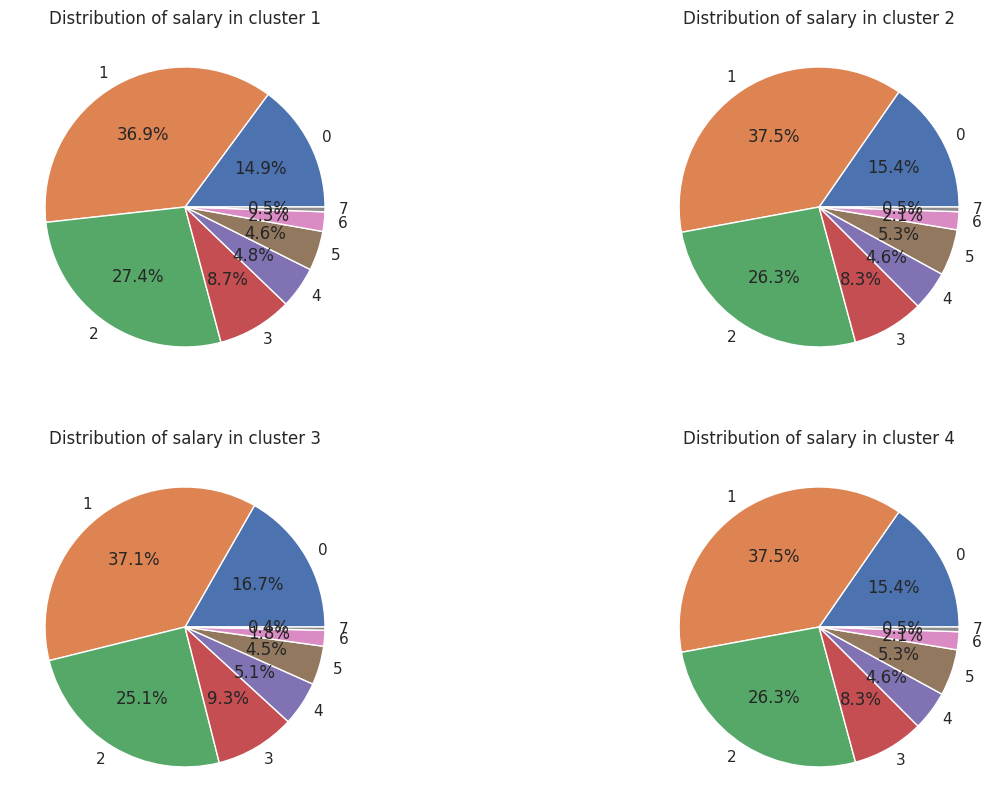

In [15]:
import matplotlib.pyplot as plt
plt.tight_layout
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
zero_indices = list(finalx.index[y_pred_combined == 0])
# Subset the original dataframe using the zero_indices list
finalx_subset = finalx.iloc[zero_indices, :]

# Print the subsetted dataframe

arr = finalx_subset["Q7_A6"].values
labels ,sizes= np.unique(finalx_subset['Q7_A6'].values,return_counts=True)# Sample data


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of salary in cluster 1')

# Show the chart
plt.subplot(2,2,2)
zero_indices = list(finalx.index[y_pred_combined == 1])
# Subset the original dataframe using the zero_indices list
finalx_subset = finalx.iloc[zero_indices, :]

# Print the subsetted dataframe

arr = finalx_subset["Q7_A6"].values
labels ,sizes= np.unique(finalx_subset['Q7_A6'].values,return_counts=True)# Sample data


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of salary in cluster 2')

plt.subplot(2,2,3)
zero_indices = list(finalx.index[y_pred_combined == 2])
# Subset the original dataframe using the zero_indices list
finalx_subset = finalx.iloc[zero_indices, :]

# Print the subsetted dataframe

arr = finalx_subset["Q7_A6"].values
labels ,sizes= np.unique(finalx_subset['Q7_A6'].values,return_counts=True)# Sample data


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of salary in cluster 3')
plt.subplot(2,2,4)
zero_indices = list(finalx.index[y_pred_combined == 1])
# Subset the original dataframe using the zero_indices list
finalx_subset = finalx.iloc[zero_indices, :]

# Print the subsetted dataframe

arr = finalx_subset["Q7_A6"].values
labels ,sizes= np.unique(finalx_subset['Q7_A6'].values,return_counts=True)# Sample data


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of salary in cluster 4');

# **if we to choose to explore the distribuition of the salary variable due to his high correlation with the target variable inside each cluster we find that it has roughly the same distribution across all clusters**

Several reasons may explain why the clustering of Algerian households based on income and equipment did not yield clearly distinct clusters. First of all, thanks to the law n° 10-01 of 25 Ramadhan 1431 corresponding to September 3, 2010 relating to the currency and the credit authorizing the credits for consumption allowed the households to have access to credits to buy consumer goods such as household appliances, furniture and cars In addition, the declaration of income may be distorted or incomplete, which makes it difficult to assess the real standard of living of households. Households may also engage in undeclared activities to supplement their income, which makes it difficult to collect reliable data. Another factor to consider is inheritance. There are several people in Algeria who have a high standard of living thanks to inheritance. This can distort the classification of households according to their actual standard of living. meaning the dataset provided is not sufficent to come up with meanignful clusters